# Computational Biology - merged code Vitto/Rita/Kaat

# Task 0: load the data

### 0.1 Import necessary packages

In [98]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

### 0.2 Import the data

In [99]:
#src = Path.cwd()
#data_path = src / 'Lesson_18_Project_2_visual_stimulus_parameters.npz'
#data_path1 = src / 'Lesson_18_Project_2_visual_responses.npy'

#KS note: the above code did not work for me, I think my working directionary is different so for me I copied the whole path, comment or uncomment whatever you would like to use
data_path = "c:/Users/u0157175/Documents/PhD/Computational Biology/Project_CB/Code_CB/Lesson_18_Project_2_visual_stimulus_parameters.npz"
data_path1 = "c:/Users/u0157175/Documents/PhD/Computational Biology/Project_CB/Code_CB/Lesson_18_Project_2_visual_responses.npy"

# Upload of data
with np.load(data_path) as par:
    spatial = par['spatial_frequency_by_degree']
    direction = par['direction_in_degrees']
    temporal = par['temporal_frequency_in_Hz']

resp = np.load(data_path1)


In [100]:
### Check the data ###
df_resp = pd.DataFrame(resp)

df_par = pd.DataFrame({
    'spatial_frequency_by_degree': spatial,
    'direction_in_degrees': direction,
    'temporal_frequency_in_Hz': temporal
})

print(df_resp)
print(df_par)

spatial_freqs = np.unique(spatial)
print(spatial_freqs)

          0         1         2         3         4         5         6    \
0    0.607607  0.072891  0.218726  0.077552  0.073388  0.391627  0.087263   
1    0.293065  0.168580  0.203128  1.116335  0.017098  1.191730  0.340933   
2    0.890373  1.894854  0.617523  0.115984  0.573180  0.810201  0.261131   
3    0.193225  0.000000  0.124397  0.088070  0.537594  0.174360  0.114392   
4    1.289745  0.733710  2.238405  0.036927  0.511579  0.711148  0.341444   
..        ...       ...       ...       ...       ...       ...       ...   
379  0.279014  0.178565  0.150451  0.194804  0.125851  0.513877  0.288002   
380  0.139950  0.265838  0.252999  0.473129  0.171920  0.292158  0.275228   
381  0.146996  0.104109  0.187060  0.059839  0.114877  0.094303  0.076701   
382  0.142322  0.218102  0.190160  0.213068  0.017988  0.160019  0.288505   
383  0.444398  0.261560  0.332300  0.330664  0.519603  0.442438  0.288307   

          7         8         9    ...       350       351       352  \
0  

# Task 1: Get the direction tuning of each neuron at different spatial frequencies

## Task explanation:
#### Calculate the average response of each neuron for each direction/spatial freq. combination
#### This should result in a (384, 12) matrix (number of neurons, combinations of direction/spatial freq)
#### Sort the directions in ascending order

In [101]:
### Sort the directions, then store the average response per direction and per spatial frequency in overal matrix "matrici" ###


# Dictionary to store the matrices
matrici = {}

# Find unique directions and sort them
directions_sorted = np.sort(df_par.loc[:, 'direction_in_degrees'].unique())     #df_par.loc: locates the column direction in degrees, for all neurons. .unique then extracts the unique values of this column. np.sort then sorts these unique values
print("Directions are", directions_sorted)

# Loop over each spatial frequency
for sf in spatial_freqs:
    # Rows (indices) corresponding to this spatial frequency
    rows_sf = df_par.index[df_par['spatial_frequency_by_degree'] == sf].tolist()

    # Create the matrix (384 neurons x 12 directions)
    mat = np.zeros((resp.shape[0], len(directions_sorted)))
    
    # Loop over the directions
    for i, dir_ in enumerate(directions_sorted):
        cols_dir = df_par.index[
            (df_par['spatial_frequency_by_degree'] == sf) & 
            (df_par['direction_in_degrees'] == dir_)
        ].tolist()                                                      # Makes list (cols_dir) of the indices of the rows for which the spatial freq is equal to sf (looped over the unique sorted sfs), and the direction in degrees is equal to dir_ (looped over the unique sorted directions)
        # Average over the repetitions of this stimulus
        mat[:, i] = df_resp.iloc[:, cols_dir].mean(axis=1)
    
    # Save the matrix in the dictionary
    matrici[sf] = mat

#print(matrici)

# Now 'matrici' contains 3 matrices, keys = spatial frequencies --> split this in different matrices

mat_004 = matrici[0.04]
mat_008 = matrici[0.08]
mat_016 = matrici[0.16]
print("Matrix 0.04 freq with dimensions: ", mat_004.shape)  # should be (384,12)
print(mat_004)
#print("Matrix 0.08 freq with dimensions: ", mat_008.shape)  # should be (384,12) 
#print(mat_008)
#print("Matrix 0.16 freq with dimensions: ", mat_016.shape)  # should be (384,12)
#print(mat_016)

Directions are [  0  30  60  90 120 150 180 210 240 270 300 330]
Matrix 0.04 freq with dimensions:  (384, 12)
[[0.10429756 0.09847079 0.02577458 ... 0.10514973 0.19241782 0.06575717]
 [0.20106628 0.20334917 0.11781342 ... 0.29328649 0.21514652 0.18186498]
 [0.17526475 0.09463864 0.27376377 ... 0.162816   0.1751078  0.10373674]
 ...
 [0.10810866 0.11160055 0.10582224 ... 0.15572471 0.12226467 0.11158209]
 [0.1406392  0.12488372 0.09097914 ... 0.11022603 0.0862275  0.12918728]
 [0.31042498 0.26838802 0.18689148 ... 0.18092832 0.25147219 0.21862928]]


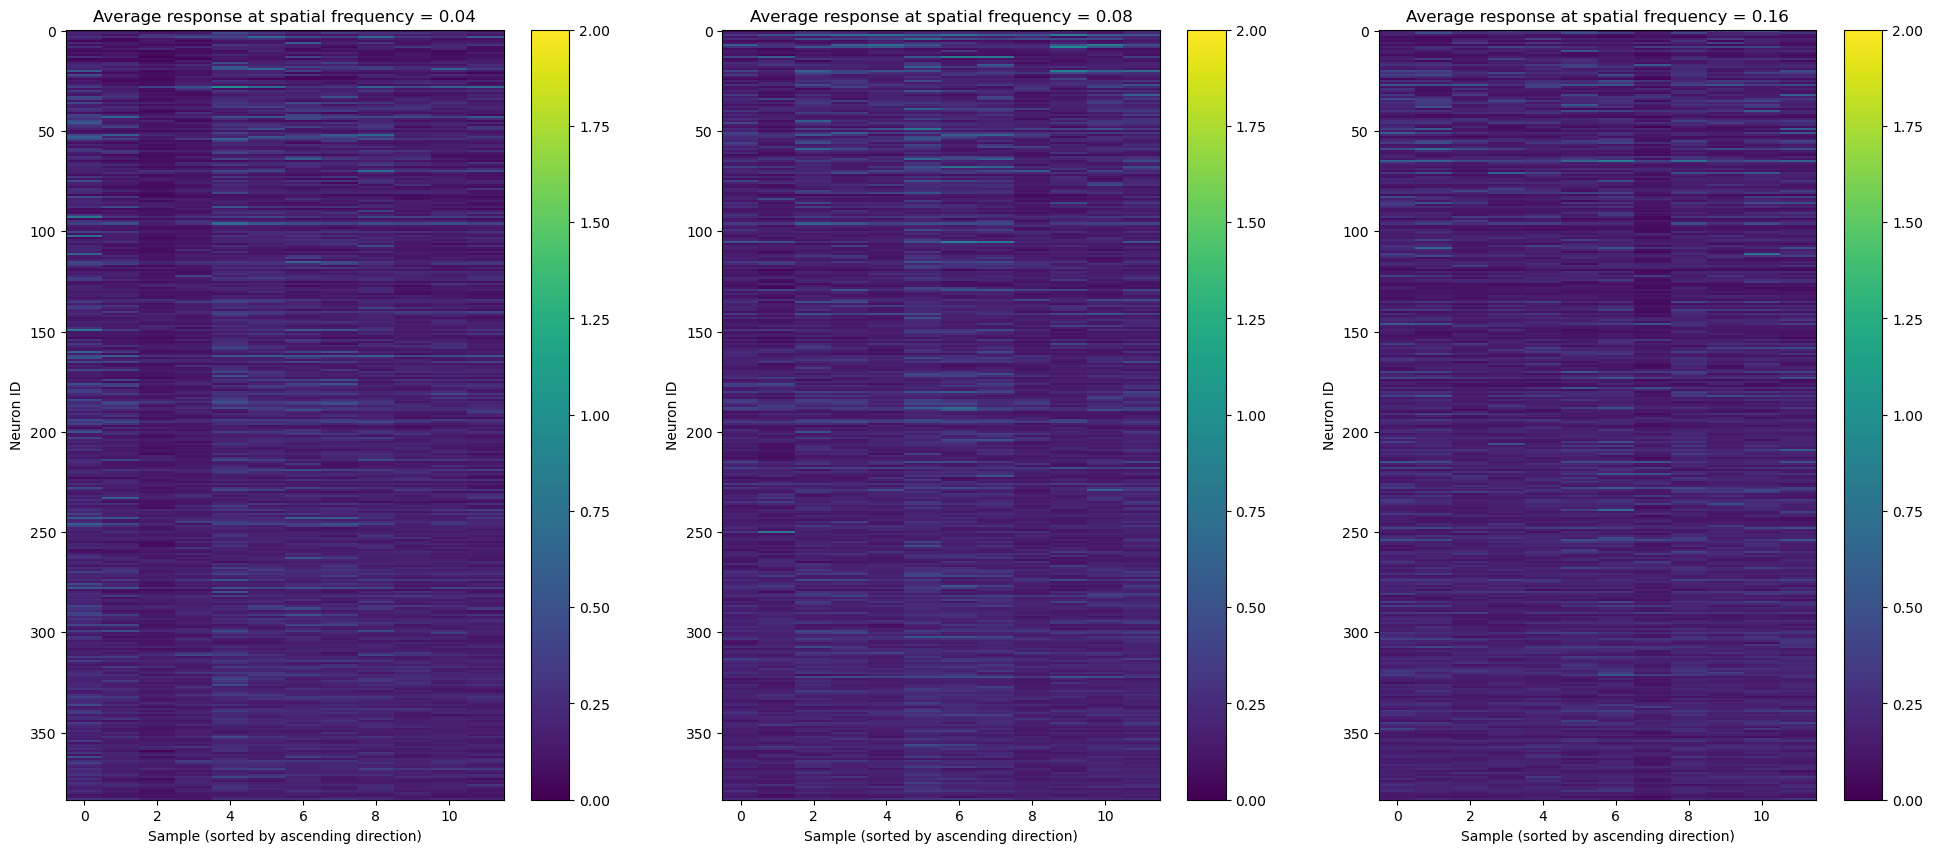

In [102]:
### Visual check: plot the average responses across directions and neurons ###

fig, ax = plt.subplots(1, 3, figsize=(24, 10))

# Each subplot visualizes a different sf (low (L, 0.04), medium (M, 0.08), and high (H, 0.16)) with a heatmap giving the average response for that neuron and direction

# KS note: if we would like to use these images I can still make them better, ie with the degrees on the x-axis instead of the index of the direction

im_avgL = ax[0].imshow(mat_004, vmin=0, vmax=2, aspect = "auto", interpolation='none')  #Can adapt vmin and vmax to enlarge differences
ax[0].set(title="Average response at spatial frequency = 0.04", ylabel="Neuron ID", xlabel="Sample (sorted by ascending direction)")
fig.colorbar(im_avgL)

im_avgM = ax[1].imshow(mat_008, vmin=0, vmax=2, aspect = "auto", interpolation='none')
ax[1].set(title="Average response at spatial frequency = 0.08", ylabel="Neuron ID", xlabel="Sample (sorted by ascending direction)")
fig.colorbar(im_avgM)


im_avgH = ax[2].imshow(mat_016, vmin=0, vmax=2, aspect = "auto", interpolation='none')
ax[2].set(title="Average response at spatial frequency = 0.16", ylabel="Neuron ID", xlabel="Sample (sorted by ascending direction)")
fig.colorbar(im_avgH)

[0.10429756 0.09847079 0.02577458 0.0630238  0.06805006 0.07377152
 0.04542954 0.07724627 0.11509149 0.10514973 0.19241782 0.06575717]


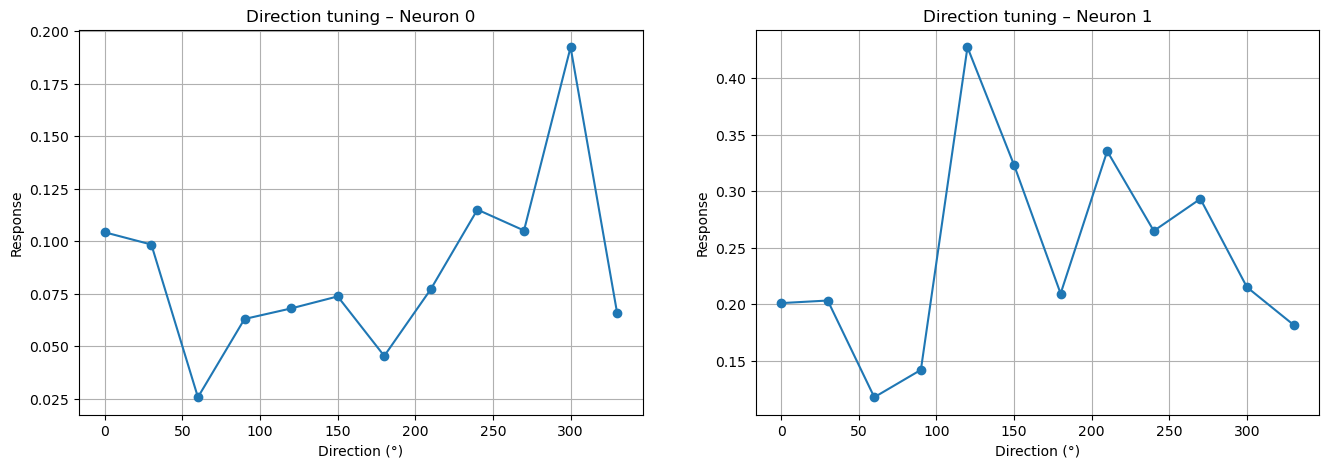

[0.10429756 0.09847079 0.02577458 0.0630238  0.06805006 0.07377152
 0.04542954 0.07724627 0.11509149 0.10514973 0.19241782 0.06575717]
[0.         0.52359878 1.04719755 1.57079633 2.0943951  2.61799388
 3.14159265 3.66519143 4.1887902  4.71238898 5.23598776 5.75958653]


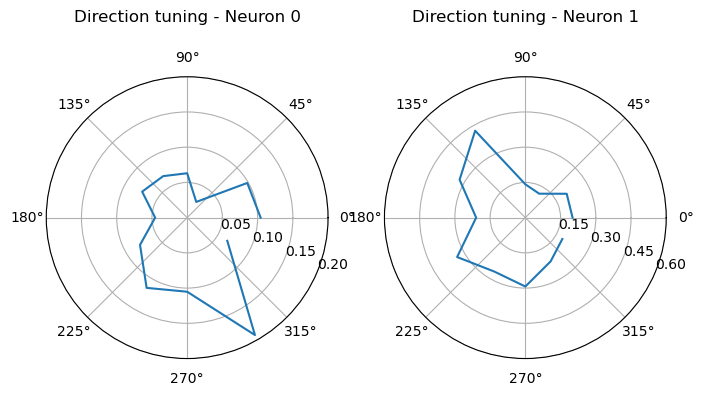

In [103]:
### Visual check: plot a neuron (regular and polar plot)

#example of evolution of neuron "0" freq 0.04
neuron_id = 0
tuning_curve = mat_004[neuron_id, :]
print(tuning_curve)

fig, axs = plt.subplots(1, 2, figsize=(16, 5))
ax = axs[0]
ax.plot(directions_sorted, tuning_curve, marker='o')
ax.set_xlabel("Direction (°)")
ax.set_ylabel("Response")
ax.set_title("Direction tuning – Neuron {}".format(neuron_id))
ax.grid(True)

#I also added neuron 1
ax = axs[1]
ax.plot(directions_sorted, mat_004[1, :], marker='o')
ax.set_xlabel("Direction (°)")
ax.set_ylabel("Response")
ax.set_title("Direction tuning – Neuron {}".format(1))
ax.grid(True)
plt.show()

#Polar plot of first 2 neurons (in polar corrdinates)
#(see https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html#)

r1 = mat_004[0,:]   #r is the average strength of the responses for the directions
r2 = mat_004[1,:]
theta = directions_sorted*np.pi/180     #Theta is the angle, in radians so need to convert the directions into radians: eg "30" will be read as 30 radians, so to convert from 30 degrees to radians, multiply by pi and divide by 180 --> gives 0.52 radians

print(r1)
print(theta)

fig, axs = plt.subplots(1, 2, figsize=(8, 5),subplot_kw={'projection': 'polar'})
ax = axs[0]
ax.plot(theta, r1)
ax.set_title("Direction tuning - Neuron 0", pad = 40)   #Pad is to move title up
ax.set_rmax(0.2)
ax.set_rticks([0.05, 0.1, 0.15, 0.2])  # Can adapt these to fit the max responses
ax.set_rlabel_position(-22.5)  # Move radial labels away from 0 degree line
ax.grid(True)


ax = axs[1]
ax.plot(theta, r2)
ax.set_title("Direction tuning - Neuron 1", pad = 40)
ax.set_rmax(0.4)
ax.set_rticks([0.15, 0.3, 0.45, 0.6])  # Can adapt these to fit the max responses
ax.set_rlabel_position(-22.5)  # Move radial labels away from 0 degree line
ax.grid(True)

plt.show()

# Task 2: Get the preferred motion direction of each neuron and the strength of directional tuning (DSI)

### Calculate preferred direction and DSI

In [108]:
preferred_direction = {}
dsi = {}

for sf in spatial_freqs:  # Loop over spatial frequencies
    mat = matrici[sf]     # Matrix: 384 neurons × 12 directions

    # creating empty storages
    preferred_direction[sf] = np.zeros(mat.shape[0])
    dsi[sf] = np.zeros(mat.shape[0])

    # Loop over each neuron
    for neuron in range(mat.shape[0]):

        # the neuron’s response across all stimulus directions
        responses = mat[neuron, :]

        # Complex vector sum
        vector_sum = np.sum(
            responses * np.exp(1j * directions_sorted / 180 * np.pi)
        )

        # Preferred direction
        pref_deg = np.angle(vector_sum) / np.pi * 180
        # Convert to 0–360 range
        pref_deg = (pref_deg + 360) % 360
        # Store preferred direction
        preferred_direction[sf][neuron] = pref_deg

        #DSI
        dsi_val = np.abs(vector_sum) / np.sum(responses)
        dsi[sf][neuron] = dsi_val


print("First 10 preferred directions SF=0.04:")
print(preferred_direction[0.04][:10])

print("First 10 DSI values SF=0.04:")
print(dsi[0.04][:10])
#print(preferred_direction)

First 10 preferred directions SF=0.04:
[292.45106603 191.98748921 108.06085565 181.38999169 162.26442724
 214.64428541 206.09767085 217.06605651 278.03467862  93.5248699 ]
First 10 DSI values SF=0.04:
[0.2223291  0.14905019 0.13968116 0.11977083 0.20192057 0.12204922
 0.19850051 0.06745074 0.04644487 0.05875911]


c:\Users\u0157175\AppData\Local\anaconda3\envs\Kaat_tryout\Lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


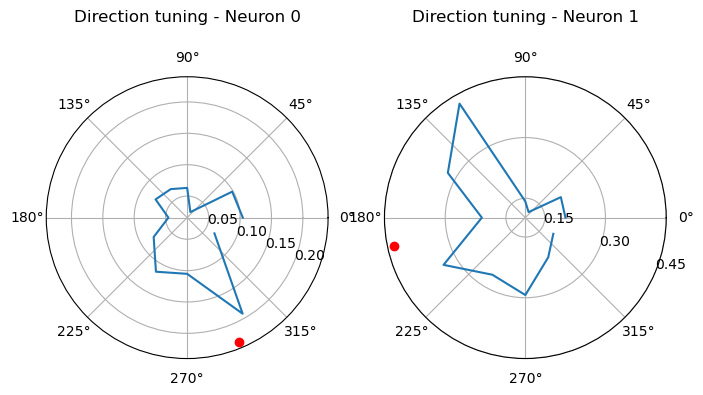

In [105]:
### Visual check: plot the preferred direction for neurons 0 and 1 (same as above) ###

r1 = mat_004[0,:]   #r is the average strength of the responses for the directions
r2 = mat_004[1,:]
theta = directions_sorted*np.pi/180     #Theta is the angle, in radians so need to convert the directions into radians: eg "30" will be read as 30 radians, so to convert from 30 degrees to radians, multiply by pi and divide by 180 --> gives 0.52 radians

#print(r1)
#print(theta)
dir_rad = directions_sorted / 180 * np.pi

vecsum_angle1 = np.angle(np.sum(mat_004[0,:] * np.exp(1j * dir_rad)))
vecsum_len1 = np.sum(mat_004[0,:] * np.exp(1j * dir_rad)) / (np.exp(1j*vecsum_angle1))

vecsum_angle2 = np.angle(np.sum(mat_004[1,:] * np.exp(1j * dir_rad)))
vecsum_len2 = np.sum(mat_004[1,:] * np.exp(1j * dir_rad)) / (np.exp(1j*vecsum_angle2))


fig, axs = plt.subplots(1, 2, figsize=(8, 5),subplot_kw={'projection': 'polar'})
ax = axs[0]
ax.plot(theta, r1)
ax.set_title("Direction tuning - Neuron 0", pad = 40)   #Pad is to move title up
ax.set_rmax(0.2)
ax.set_rticks([0.05, 0.1, 0.15, 0.2])  # Can adapt these to fit the max responses
ax.set_rlabel_position(-22.5)  # Move radial labels away from 0 degree line
ax.grid(True)
ax.scatter(vecsum_angle1, vecsum_len1, c = 'red')


ax = axs[1]
ax.plot(theta, r2)
ax.set_title("Direction tuning - Neuron 1", pad = 40)
ax.set_rmax(0.4)
ax.set_rticks([0.15, 0.3, 0.45, 0.6])  # Can adapt these to fit the max responses
ax.set_rlabel_position(-22.5)  # Move radial labels away from 0 degree line
ax.grid(True)
ax.scatter(vecsum_angle2, vecsum_len2, c = 'red')

# Task 3: Plot the distribution of the DSI to see how many neurons show strong directional tuning

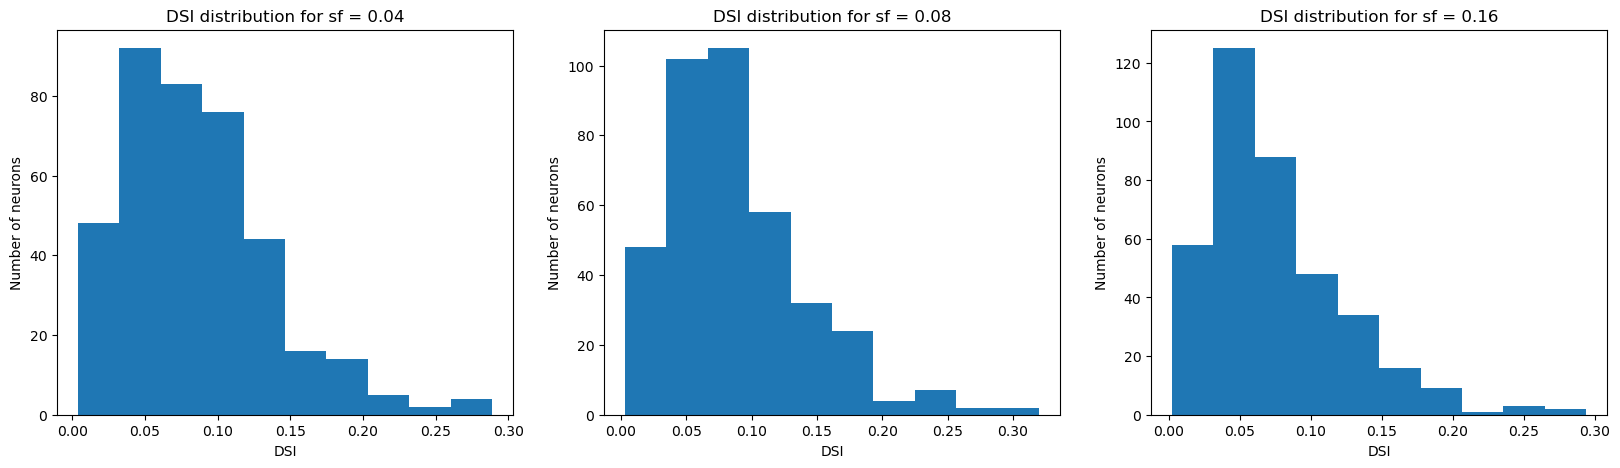

{0.04: (array([], dtype=int64),), 0.08: (array([ 32, 128], dtype=int64),), 0.16: (array([], dtype=int64),)}


In [116]:
fig, axs = plt.subplots(1,3, figsize = (20,5))

for ind, val in enumerate(dsi):
    #print(ind)
    #print(val)
    axs[ind].hist(dsi[val])
    axs[ind].set_title(f'DSI distribution for sf = {val}')
    axs[ind].set_xlabel("DSI")
    axs[ind].set_ylabel("Number of neurons")


plt.show()

#Which neurons have dsi > 0.3 ?
dsi_thresh = {}

for sf in spatial_freqs:  # Loop over spatial frequencies
    mat = dsi[sf]  
    dsi_thresh[sf] = np.where(mat > 0.3)  

print(dsi_thresh)  # I think there might be a better way to extract this so feel free to adapt


## old code for this, was way longer
#print(neur_dsi)
#neur_dsi = []
#x = 0

# The following code checks whether a dsi is larger than 0.3 and only if so, it appends the index and value to an overal array neur_dsi (comprising all high-med-low)
#for ind, val in enumerate(dsi[0.04]):
#    if val > 0.3:
#        neur_dsi.append((ind,val))
#        x = x + 1
#print(neur_dsi)

#for ind, val in enumerate(dsi[0.08]):
#   if val > 0.3:
#        neur_dsi.append((ind,val))
#        x = x + 1
#print(neur_dsi)

#for ind, val in enumerate(dsi[0.16]):
#   if val > 0.3:
#        neur_dsi.append((ind,val))
#        x = x + 1
#print(neur_dsi)


range(0, 3)
32
128


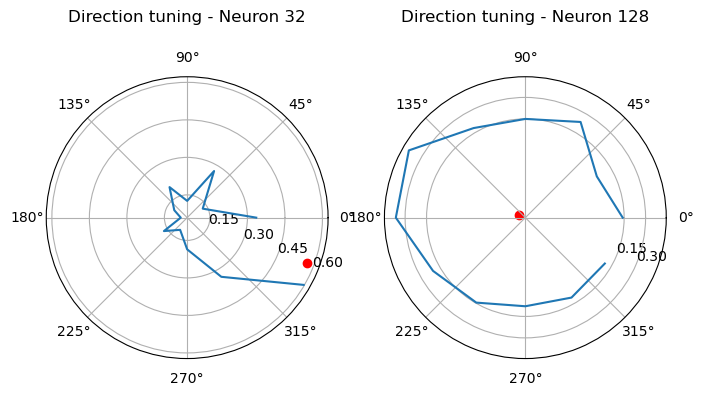

In [107]:
### Visualize these neurons with their preferred direction ###

#This is not superclean but does the trick for now

print(range(len(dsi_thresh)))
for i in range(len(dsi_thresh[0.08][0])):
    neur = dsi_thresh[0.08][0][i]
    print(neur)


theta = directions_sorted*np.pi/180
fig, axs = plt.subplots(1, 2, figsize=(8, 5),subplot_kw={'projection': 'polar'})

for i in range(len(dsi_thresh[0.08][0])):
    neur = dsi_thresh[0.08][0][i]
    #print(neur)

    r = mat_008[neur,:]   #r is the average strength of the responses for the directions

    vecsum_angle = np.angle(np.sum(r * np.exp(1j * dir_rad)))
    vecsum_len = np.sum(r * np.exp(1j * dir_rad)) / (np.exp(1j*vecsum_angle1))

    ax = axs[i]
    ax.plot(theta, r)
    ax.set_title(f'Direction tuning - Neuron {neur}', pad = 40)   #Pad is to move title up
    ax.set_rmax(0.2)
    ax.set_rticks([0.15, 0.3, 0.45, 0.6])  # Can adapt these to fit the max responses
    ax.set_rlabel_position(-22.5)  # Move radial labels away from 0 degree line
    ax.grid(True)
    ax.scatter(vecsum_angle, vecsum_len, c = 'red') # Indicates preferred direction

